# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определение рыночной цены позволит построить автоматизированную систему по отслеживанию аномалий и мошеннической деятельности. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования** - определить рыночную стоимость объектов недвижимости.

В датасете `real_estate_data.csv` представлено 22 характеристики объектов недвижимости:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пунктаopen_plan — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Часть данных заполняется пользователем, например, расстояние от дома до некоторых объектов инфраструктуры, а другая часть заполняется автоматически.

**План работы**

1. Изучим данные, сделаем описательную статистику показателей и построим гистограммы
2. Проведем предобработку данных:
 - Выделим и обработаем пропущенные значения
 - Преобразуем данные в корректный тип
 - Приведем часть данных к единому виду, если это потребуется
3. Для удобства проведения анализа преобразуем и выделим часть параметров в отдельные столбцы
4. Данные готовы - можно проводить исследовательский анализ:
 - Выведем описательную статистику и построим графики по основным полям датасета, чтобы понять, какие данные могут исказить результаты анализа
 - Посчитаем скорость продажи квартир и определим факторы, влияющие на стоимость объекта
 - Узнаем среднюю цену квадратного метра в ТОП-10 населенных пунктов с большим количеством объявлений
 - Определим среднюю цену километра (насколько меняется цена квадратного метра жилья по мере отдаленности от центра)

Далее подведем итоги исследования.

## Изучение данных из файла 

In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [3]:
# загрузка данных
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')

Посмотрим общую информацию о данных

In [4]:
display(data.head(10))
display(data.info())
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
# Проверим таблицу на явные дубликаты
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

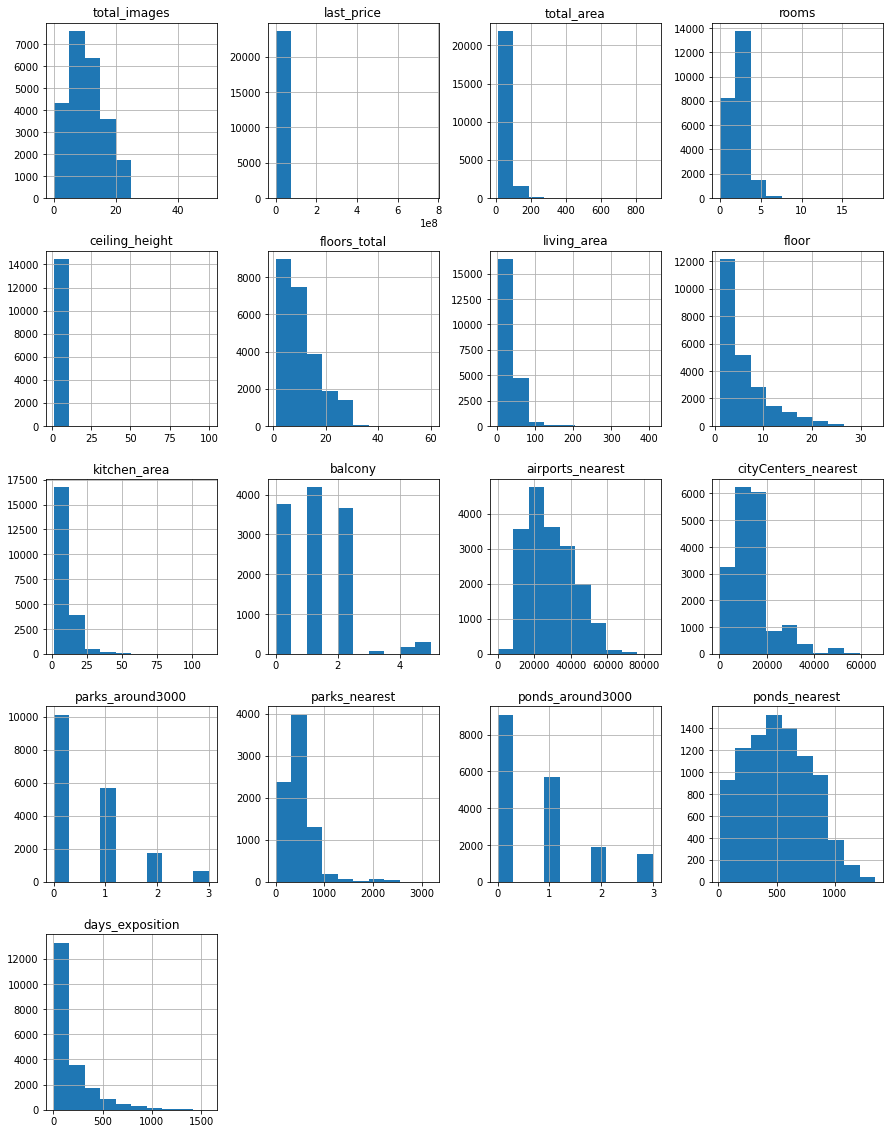

In [7]:
# Построим гистограммы
data.hist(figsize=(15, 20))

В таблице содержится 23699 записи без дубликатов. Каждая запись - объект недвижимости, который описывается 22 признаками.

**Вывод**

Предварительный анализ данных показал следующее:
1. В таблице содержится много пропусков
2. Тип данных в столбцах is_apartment, studio, open_plan по условию должен быть boolean, в floors_total - int, а в first_day_exposition - datetime)
3. Стилистическая ошибки в наименованиях столбцов
4. Наблюдаются аномальные значения

## Предобработка данных

### Обработка пропущенных значений

In [8]:
# Выведем на экран количество пропусков в каждом столбце
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

В таблице `data` много пропусков. Рассмотрим процент пропущенных значений по каждому столбцу.

In [9]:
display((data.isna().sum()/len(data)*100).sort_values(ascending = False))
print(f'Средний процент пропусков составил: {(data.isna().sum()/len(data)*100).mean():.2f}%')

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Средний процент пропусков составил: 19.46%


Доля пропусков в `data` достаточно высокая. Рассмотрим более подробно столбцы с пропусками и дадим комментарии.

**Столбец `is_apartment`**

In [10]:
# Выведем уникальные значения в столбце на экран
display(data['is_apartment'].unique())

array([nan, False, True], dtype=object)

Тип данных - `object`. Вероятная причина пропусков - посетители не ставят отметку, что недвижимость является апартаментами. Заполним пустые значения нулями и приведем данные в столбцу к типу boolean.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(value=0).astype('bool')
display(data['is_apartment'].dtype) # Выведем тип данных столбца
data['is_apartment'].isna().sum() # Проверим кол-во пропусков

dtype('bool')

0

**Столбец `balcony`**

In [12]:
# Выведем уникальные значения в столбце на экран
display(data['balcony'].unique())

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Тип данных - `float`. 
- NaN может означать, что на объекте нет балконов, поэтому заполним пропуски нулями
- Количество балконов должно быть целым числом

In [13]:
data['balcony'] = data['balcony'].fillna(value=0).astype('int')
display(data['balcony'].dtype)  # Выведем тип данных столбца
data['balcony'].isna().sum() # Проверим кол-во пропусков

dtype('int64')

0

**Столбец `ceiling_height`**

1. У большей части объектов стоят пропуски (9125 шт.). Их можно заполнить медианным значением группы объектов, которые отделены от аномальных значений
2. Аномальные значения: минимальная высота потолка составляет 1м, а максимальная высота 100м. За нормальную высоту потолков примем интервал от 2,4м до 6,6м (если это двухъярусная квартира).
3. Для более глубокого анализа посмотрим, есть ли в данных значения, которые не могут соответствовать реальности. Например, высота потолков более 20м.

Эту информацию заполняет пользователь, поэтому ее либо не указывают, либо указывают ошибочно (например, не там ставят запятую или не ставят вовсе).

In [14]:
# Посмотрим распределение значений высоты потолков по группам (10%, 25%, 50%, 75%, 90%)
display(data['ceiling_height'].describe(percentiles=[0.1, 1/4, 1/2, 0.75, 0.9]))

# Постараемся восстановить данные, поделив целевую группу некорректных данных на 10
data.loc[(data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 66), 'ceiling_height'] = data['ceiling_height'] / 10

# Посмотрим, что получилось после замены
display(data['ceiling_height'].describe(percentiles=[0.1, 1/4, 1/2, 0.75, 0.9]))

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
10%          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
90%          3.060000
max        100.000000
Name: ceiling_height, dtype: float64

count    14504.000000
mean         2.738456
std          0.893702
min          1.000000
10%          2.500000
25%          2.510000
50%          2.650000
75%          2.800000
90%          3.050000
max        100.000000
Name: ceiling_height, dtype: float64

После корректировки std значительно снизился. Нам удалось уменьшить разброс данных.

Из описательной статистики можно увидеть, что у 10% объектов высота потолка составляет от 3.05м до 100м. Еще у 10% объектов высота потолков составляет менее 2,5м. Посмотрим, что за значения лежат в этом интервале.

In [16]:
display(data.loc[data['ceiling_height'] > 3.05, 'ceiling_height'].unique())
display(data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'].unique())

array([  3.2 ,   3.25,   3.45,   4.15,   3.5 ,   3.3 ,   4.  ,   3.1 ,
         3.4 ,   3.06,   3.7 ,   5.2 ,   3.6 ,   3.11,   3.13,   3.8 ,
         3.15,   3.55,   3.16,   3.62,   3.12,   5.3 ,   5.  ,   4.06,
         3.82,   3.54,   3.53,   4.7 ,   3.38,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   3.57,   3.98,   3.83,   3.52,   3.95,   3.75,
         3.67,   3.87,   3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,   3.08,   3.68,   3.07,   3.37,   3.09,
         8.  ,   3.26,   3.34,   3.44,   3.14,   4.37,   3.22,   3.27,
         4.1 ,   3.46,   3.47,   3.33,   3.63,   3.32,   8.3 ,   3.17,
         4.4 ,   3.28,   4.45,   5.5 ,   3.84,   3.23,   3.21,   3.43,
         3.78,   4.3 ,   3.39,   3.31,   4.65,   3.56,   3.51,   3.93,
         3.42,   3.49,  14.  ,   4.14,   3.88,   4.25,   3.29,  20.  ,
         3.76,   3.69,   6.  ,  22.6 ,   3.58,   5.8 ,   4.9 ,   3.48,
        10.3 , 100.  ,   3.59])

array([2.47, 2.34, 2.  , 2.45, 2.46, 2.4 , 2.3 , 2.48, 1.2 , 2.2 , 1.75,
       2.25, 2.49, 1.  ])

Действительно, есть значения, которые не соответствуют реальности, поэтому от них можно избавиться. Оценим, сколько данных мы потеряем, удалив эти объекты из анализа.

In [17]:
# Возьмем ранее описанный допустимый интервал высоты потолков
len(data.loc[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 6.6)])

30

30 записей - это примерно 0,1% от всей выборки, так что можно удалять.

In [18]:
data = data.loc[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 6.6)]

Далее идем на нашему плану - заполним пропуски медианным значением и посмотрим, насколько корректно теперь выглядят значения в столбце `ceiling_height`.

In [19]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

# Выведем описательную статистику на экран
display(data['ceiling_height'].describe())

count    14450.000000
mean         2.728016
std          0.277819
min          2.450000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Большая часть квартир имеет стандартную высоту потолков - 2,65м

**Столбец `floors_total`**

In [20]:
# Кол-во пропусков
display(data['floors_total'].isna().sum())

# массив объектов, у которых не заполнено общее кол-во этажей, но есть этаж
data[data['floors_total'].isna()]['floor'].unique() 

9

array([21,  4, 23,  3,  2, 19,  8])

У 86 объектов не проставлено общее количество этажей в здании. Данные заполняет пользователь, поэтому из-за опционального характера поля некоторые посетители не зполняли его вовсе. Предположим, что если этаж объекта меньше или равен 5 (пятиэтажка), то в floors_total пишем 5, а если больше 5, то назначим текущий этаж в качестве последнего в floors_total.

In [21]:
for floor in data[data.floors_total.isna()]['floor'].unique():
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= 5), 'floors_total'] = 5
    data.loc[(data['floors_total'].isna()) & (data['floor'] > 5), 'floors_total'] = floor

# Выведем описательную статистику на экран
data['floors_total'].describe()

count    14450.000000
mean        10.182976
std          6.203686
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

**Столбец `locality_name`**

In [22]:
# кол-во пропусков
display(data['locality_name'].isna().sum()) 

# Очистим таблицу от записей с пустым locality_name, так как восстановить данные не представляется возможным
data.dropna(subset=['locality_name'], inplace=True)

# Выведем уникальные наименования населенных пунктов
data['locality_name'].unique()

14

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок городского типа Красный Бор',
       'посёлок Мурино', 'Сертолово', 'Гатчина', 'поселок Мурино',
       'Ломоносов', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Колпино', 'Кировск', 'деревня Новое Девяткино',
       'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'поселок Оредеж',
       

Предполагаем, что пропуски образовались также из-за опционального типа поля либо из-за того, что в справочнике не оказалось наименования локации объекта.

Можно заметить, что в столбце встречаются неявные дубликаты. Где-то слово "поселок" пишется через "е", а где-то через "ё". Также встречается разное наименование типа населенного пункта с одинаковым названием. Избавимся от типа населенного пункта и оставим только его наименование с помощью функции `clear_type_of_locality()`

In [23]:
# Функция clear_type_of_locality проверяет каждое слово в значении столбца, написано ли оно с большой буквы:
# Если слово написано с большой буквы, то это является наименованием населенного пункта.
# В нашем случае данный способ подходит, так как населенные пункты написаны с большой буквы в таблице data

def clear_type_of_locality(row):
    result_city = ''
    row = str(row)
    row_splt = row.split()
    
    for word in row_splt:
        if word.istitle():
            result_city = result_city + word + ' '
    
    return result_city.strip()

# Применим функцию к столбцу locality_name и заменим в нем значения
data['locality_name'] = data['locality_name'].apply(clear_type_of_locality)

# Выведем уникальные значения столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'Парголово', 'Кудрово', 'Пушкин',
       'Красный Бор', 'Мурино', 'Сертолово', 'Гатчина', 'Ломоносов',
       'Фёдоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'Новое Девяткино', 'Сиверский', 'Новая Ропша', 'Павловск',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Кузьмоловский', 'Куттузи', 'Торковичи', 'Шушары', 'Первомайское',
       'Красное Село', 'Понтонный', 'Старая', 'Лесколово', 'Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Рощино', 'Сясьстрой',
       'Кириши', 'Луга', 'Волосово', 'Оредеж', 'Бугры', 'Металлострой',
       'Молодёжное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Романовка', 'Александровская', 'Лопухинка', 'Советский',
       'Петровское', 'Токсово', 'Новый Свет', 'Келози', 'Вартемяги',
       'Подпорожье', 'Тельмана', 'Большая Ижора', 'Бокситогорск',
       'Янино-1', 'Павло

Действительно, наименований населенных пунктов стало меньше. Посмотрим данные обработанной таблицы.

In [24]:
data.isna().sum().sort_values(ascending = False)

parks_nearest           9168
ponds_nearest           8732
airports_nearest        2938
cityCenters_nearest     2918
ponds_around3000        2917
parks_around3000        2917
days_exposition         2446
kitchen_area             931
living_area              793
locality_name              0
balcony                    0
total_images               0
last_price                 0
studio                     0
is_apartment               0
floor                      0
floors_total               0
ceiling_height             0
rooms                      0
first_day_exposition       0
total_area                 0
open_plan                  0
dtype: int64

**Столбец `cityCenters_nearest`**

In [25]:
# Переименуем столбец cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

# кол-во пропусков
display(data['city_centers_nearest'].isna().sum()) 

# Заполним пропуски в city_centers_nearest медианным значением расстояния до центра по населенному пункту
for locality in data['locality_name'].unique():
    data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=data[(data['city_centers_nearest'].notna()) & (data['locality_name'] == locality)]['city_centers_nearest'].median())
    
# Проверим: не должно быть пропусков в city_centers_nearest
data.isna().sum().sort_values(ascending = False)

2918

parks_nearest           9168
ponds_nearest           8732
airports_nearest        2938
ponds_around3000        2917
parks_around3000        2917
days_exposition         2446
kitchen_area             931
living_area              793
city_centers_nearest       0
locality_name              0
balcony                    0
total_images               0
last_price                 0
studio                     0
is_apartment               0
floor                      0
floors_total               0
ceiling_height             0
rooms                      0
first_day_exposition       0
total_area                 0
open_plan                  0
dtype: int64

**Столбец `last_price`**

In [26]:
# Переведем цены из руб. в тыс. руб.
data['last_price'] = data['last_price'] / 1000
display(data['last_price'].value_counts().sort_values(ascending = False))

4500.000     213
3500.000     169
4200.000     168
3600.000     159
5500.000     154
            ... 
11060.000      1
31750.000      1
6029.433       1
4928.000       1
4283.300       1
Name: last_price, Length: 2059, dtype: int64

**Столбцы `kitchen_area`, `living_area`, `total_area`**

1. В студиях не должно быть количества комнат, поэтому там, где пользователи указали количество комнат, проставим `0`
2. В квартирах со свободной планировкой указывать количество комнат также некорректно
3. Сгруппируем квартиры по количеству комнат и заполним пустые значения медианным значением доли `kitchen_area`/`living_area` в `total_area` в каждой группе.

In [27]:
# Проставим в студиях и в квартирах со свободной планировкой нули в rooms
data.loc[data['studio'] == True, 'rooms'] = 0
data.loc[data['open_plan'] == True, 'rooms'] = 0

# Заполним пропуски в living_area медианным значением по группе rooms
for flat in data['rooms'].unique():
    living_area_median = (data[data['rooms'] == flat]['living_area'] / data[data['rooms'] == flat]['total_area']).median()
    data['living_area'] = data['living_area'].fillna(value = data['total_area'] * living_area_median)

# Заполним пропуски в kitchen_area медианным значением по группе rooms
for flat in data['rooms'].unique():
    kitchen_area_median = (data[data['rooms'] == flat]['kitchen_area'] / data[data['rooms'] == flat]['total_area']).median()
    data['kitchen_area'] = data['kitchen_area'].fillna(value = data['total_area'] * kitchen_area_median)

**Столбец `first_day_exposition`**

In [28]:
# Преобразуем тип данных в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Столбцы `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `airports_nearest`**

Эти столбцы заполняются автоматически, поэтому природа пропусков неизвестна. Восстановить данные не получится. Эти данные можно не трогать, так как они не понадобятся в исслодовании.

**Столбец `days_exposition`**

Его оставим без изменений. Недостаточно контекста, чтобы менять данные.

**Вывод**

1. Были проанализированы столбцы с пропущенными значениями. 
- В `is_apartment` пропуски заполнены нулями. 0 означает, что объект не является апартаментами
- Отсутствие значений в `balcony` означает, что в квартире нет балконов
- Восстановили значения в `floors_total`
- Заполнили пропуски в `city_centers_nearest` медианным значением расстояния до центра по населенному пункту
- Заполнили пропуски в `living_area` и `kitchen_area` медианным значением по группе квартир с одинаковым количеством комнат
2. Удалены записи, в которых высота потолков превышает нормативные значения (от 2,4м до 6,6м)
3. Привели наименования населенных пунктов к единому виду

## Расчеты и добавление новых столбцов

Рассчитаем и добавим в таблицу цену одного квадратного метра, поделив `last_price` на `total_area`. Результат вычислений занесем в столбец `price_per_m2`

In [29]:
data['price_per_m2'] = round(data['last_price'] / data['total_area'], 2)

Рассчитаем и добавим в таблицу `data` день, месяц и год публикации объявления, вытащив значения из `first_day_exposition`. Результат занесем в столбец `num_day_exposition`

In [30]:
# Добавим месяц публикации объявления в num_day_exposition, вытащив значение из first_day_exposition
data['num_day_exposition'] = data['first_day_exposition'].dt.dayofweek

# Добавим месяц публикации объявления в num_month_exposition, вытащив значение из first_day_exposition
data['num_month_exposition'] = data['first_day_exposition'].dt.month

# Добавим месяц публикации объявления в num_year_exposition, вытащив значение из first_day_exposition
data['num_year_exposition'] = data['first_day_exposition'].dt.year

Определим тип этажа квартиры. Результат вычислений занесем в столбец `flat_floor_type`

In [31]:
data['flat_floor_type'] = 'средний'
data.loc[data['floor'] == 1, 'flat_floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'flat_floor_type'] = 'последний'

Определим и добавим в таблицу `data` расстояние в км до центра города, поделив `city_centers_nearest` на 1000. Результат вычислений выразим в целых числах и занесем в столбец `city_center_distance`

In [32]:
data['city_center_distance'] = (data['city_centers_nearest'] / 1000).astype(int)

In [33]:
# Выведем результат
display(data.head())
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.37,3,3,2019,средний,16
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.00,1,6,2018,средний,8
9,18,5400.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88.52,6,2,2017,средний,15
10,5,5050.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127.53,3,11,2017,средний,13
13,20,3550.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82.94,5,7,2017,последний,33


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,city_center_distance
count,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000,11498.000000,14436.000000,11519.000000,5268.000000,11519.000000,5704.000000,11990.000000,14436.000000,14436.000000,14436.000000,14436.000000,14436.000000
mean,10.332225,6845.156727,61.932501,2.136534,2.727761,10.184816,36.043979,5.629953,10.385044,0.679205,28837.787615,13684.477071,0.637816,476.567578,0.773852,518.461080,190.579066,101.672273,2.501039,6.323358,2017.509906,13.251593
std,5.629064,10201.343840,37.042875,1.100930,0.277590,6.202567,23.543046,4.621850,6.121304,1.015003,12634.940407,7862.080763,0.820437,320.466257,0.950771,280.272145,228.950049,50.502922,1.789996,3.501027,1.027761,7.852556
min,0.000000,12.190000,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,3.000000,0.000000,16.000000,1.000000,0.110000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3580.000000,41.000000,1.000000,2.520000,5.000000,19.900000,2.000000,7.000000,0.000000,18553.250000,10594.250000,0.000000,284.750000,0.000000,287.000000,45.000000,78.480000,1.000000,3.000000,2017.000000,10.000000
50%,10.000000,4860.500000,53.400000,2.000000,2.650000,9.000000,31.000000,4.000000,9.000000,0.000000,26765.500000,12177.000000,0.000000,448.000000,0.000000,504.000000,103.000000,96.740000,2.000000,6.000000,2018.000000,12.000000
75%,15.000000,7032.500000,71.400000,3.000000,2.800000,14.000000,43.400000,7.000000,11.800000,1.000000,37099.000000,15195.000000,1.000000,602.000000,1.000000,733.000000,247.750000,116.580000,4.000000,10.000000,2018.000000,15.000000
max,50.000000,420000.000000,900.000000,16.000000,6.000000,60.000000,409.700000,30.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1736.840000,6.000000,12.000000,2019.000000,65.000000


**Вывод**

В таблицу были добавлены дополнительные показатели для дальнейшего анализа данных:
- Цена квадратного метра
- Разделили дату публикации на день, месяц и год
- Определили тип этажа (первый / средний / последний)
- Перевели расстояние от центра до квартира из метров в километры

## Исследовательский анализ данных

### Изучим параметры объектов

Напишем функцию, которая выводит первичные данные о столбце и строит гистограмму.

In [34]:
# col_name - имя столбца (str)
# hist_title - заголовок гистограммы
# quant_bins - кол-во корзин в гистограмме

def display_hist(col_name, hist_title, quant_bins, rng_min=0, rng_max=0):
    if rng_min == 0 and rng_max == 0:
        data.hist(col_name, bins=quant_bins, figsize=(15,5)) 
    else:
        data.hist(col_name, bins=quant_bins, figsize=(15,5), range=(rng_min, rng_max))
    plt.title(hist_title)
    plt.show()

Построим гистграммы для каждого из параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Общая площадь**

In [35]:
current_col_name = 'total_area'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean        61.932501
std         37.042875
min         12.000000
25%         41.000000
50%         53.400000
75%         71.400000
max        900.000000
Name: total_area, dtype: float64

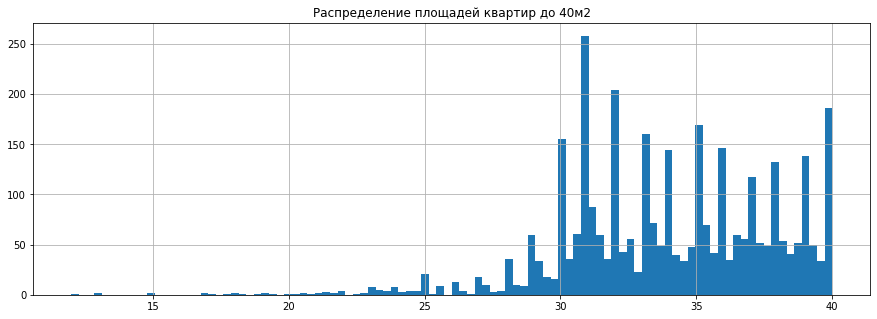

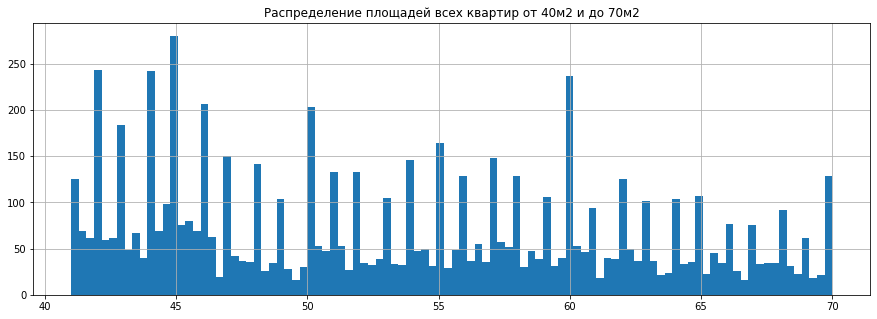

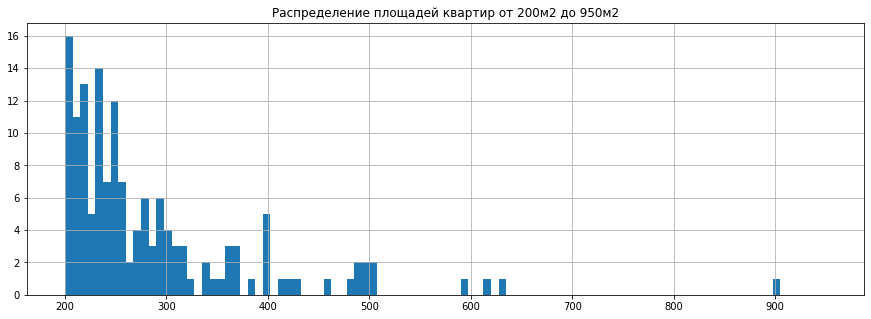

In [36]:
# Построим графики в разных интервалах для наглядности распределения
display_hist(current_col_name, 'Распределение площадей квартир до 40м2', 100, 12, 40)
display_hist(current_col_name, 'Распределение площадей всех квартир от 40м2 и до 70м2', 100, 41, 70)
display_hist(current_col_name, 'Распределение площадей квартир от 200м2 до 950м2', 100, 200, 950)

In [37]:
# Интересно посмотреть, что за квартира площадью 900м2
data[data['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
19540,8,420000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,466.67,2,12,2017,последний,7


Одна из самых больших квартир, в которой 12 комнат. Расположена на 25 этаже, рядом с центром и прудами. Допускаем, что владельцы не ошиблись с площадью.

Большая часть квартир имеет площадь от 40м2 до 70м2. Пик приходится на квартиры площадью 50м2. Наблюдаются выдающиеся значения - есть квартира площадью 900м2, которая имеет место быть. Среднее (60м2) и медианное (52м2) значения площади квартир укладывается в привычное представление о размере квартир.

**Жилая площадь**

In [38]:
current_col_name = 'living_area'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean        36.043979
std         23.543046
min          2.000000
25%         19.900000
50%         31.000000
75%         43.400000
max        409.700000
Name: living_area, dtype: float64

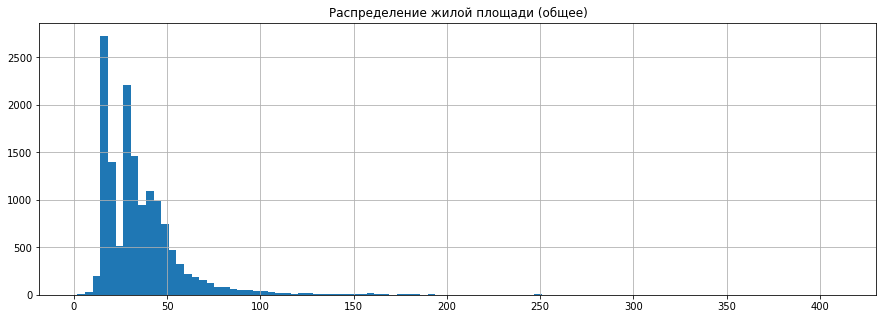

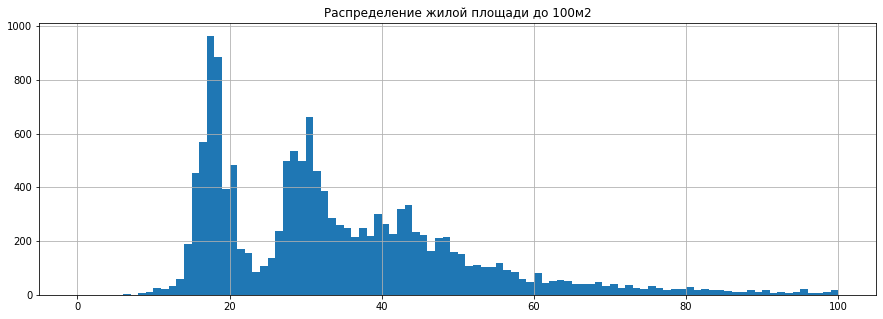

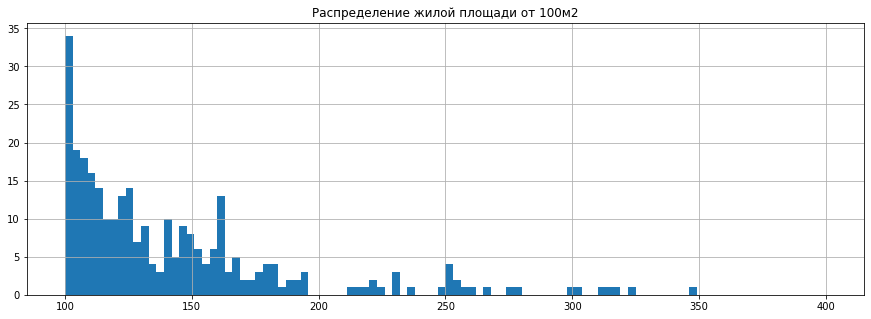

In [39]:
display_hist(current_col_name, 'Распределение жилой площади (общее)', 100, 2, 410)
display_hist(current_col_name, 'Распределение жилой площади до 100м2', 100, 0, 100)
display_hist(current_col_name, 'Распределение жилой площади от 100м2', 100, 100, 400)

Самая большая жилая площадь у квартиры с самой большой квадратурой - 410м2. Остальные значения укладываются в общее представление о жилой площади.

**Площадь кухни**

In [40]:
current_col_name = 'kitchen_area'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean        10.385044
std          6.121304
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

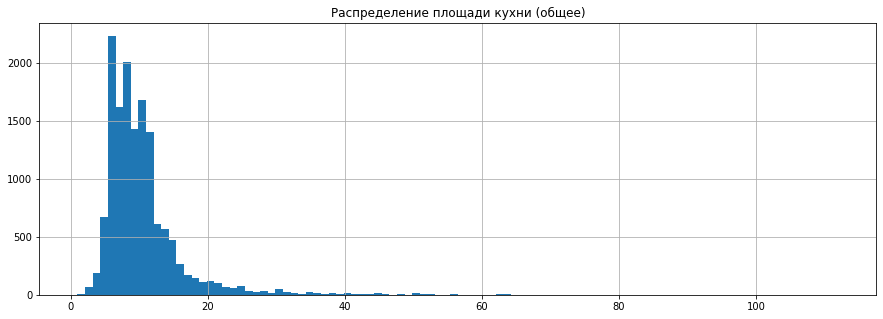

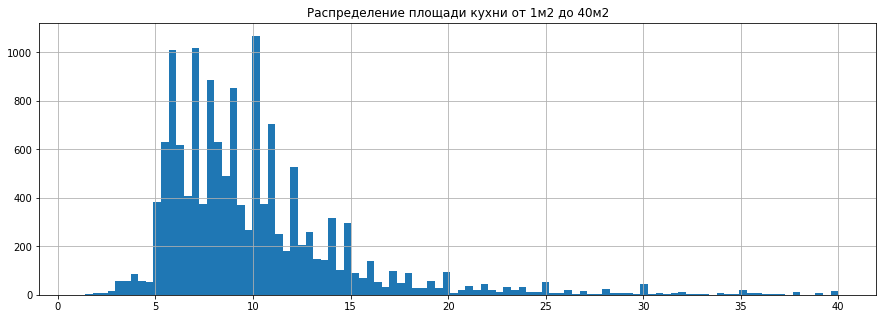

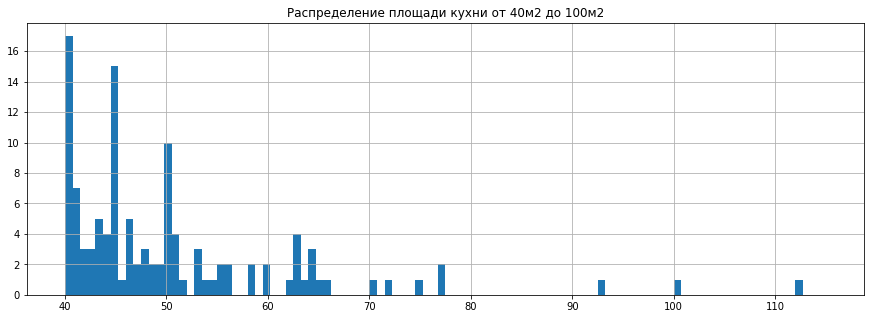

In [41]:
display_hist(current_col_name, 'Распределение площади кухни (общее)', 100, 1, 112)
display_hist(current_col_name, 'Распределение площади кухни от 1м2 до 40м2', 100, 1, 40)
display_hist(current_col_name, 'Распределение площади кухни от 40м2 до 100м2', 100, 40, 115)

Среднее значение площади кухни составило 10м2, медианное - 9м2. Можно увидеть выбросы, в которых площадь кухни составляет 50+м2. Допускаем, что это квартиры со свободной планировкой либо многокомнатные.

**Цена объекта**

In [42]:
current_col_name = 'last_price'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count     14436.000000
mean       6845.156727
std       10201.343840
min          12.190000
25%        3580.000000
50%        4860.500000
75%        7032.500000
max      420000.000000
Name: last_price, dtype: float64

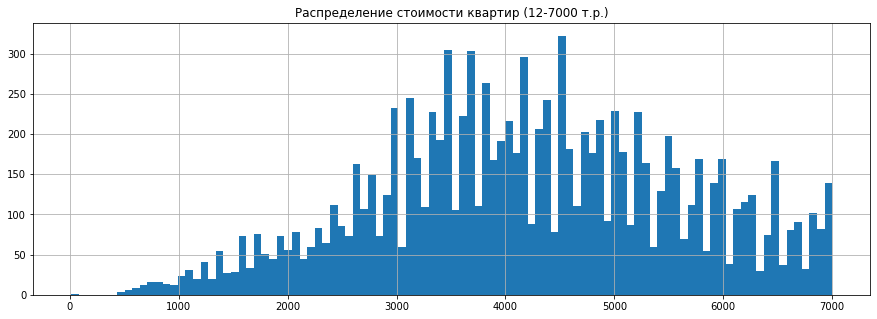

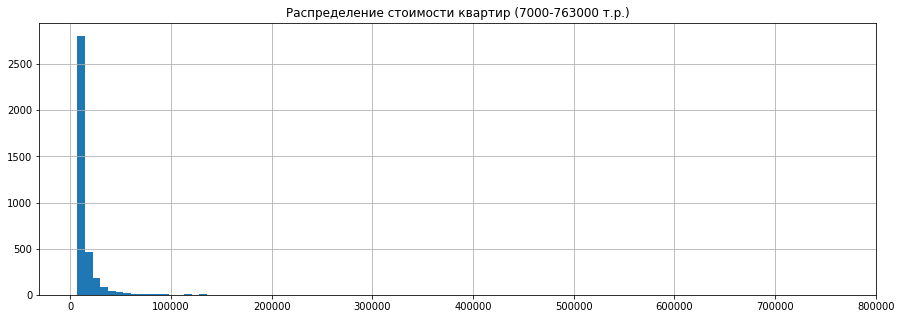

In [43]:
display_hist(current_col_name, 'Распределение стоимости квартир (12-7000 т.р.)', 100, 12, 7000)
display_hist(current_col_name, 'Распределение стоимости квартир (7000-763000 т.р.)', 100, 7000, 763000)

Из описательной статистики видно, что в таблице присутствует квартира за 12 тыс. руб. Посмотрим, что это за квартира.

In [44]:
display(data[data['last_price'] == 12.19])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
8793,7,12.19,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,0.11,2,3,2019,последний,9


Квартира за 12 тыс. руб. - это квартира в Санкт-Петербурге площадью 109м2.
Скорее всего, это ошибка в единицах измерения. Исправим это.

In [45]:
data['last_price'] = data['last_price'].replace(12.19, 12000)
display(data[current_col_name].describe())

count     14436.000000
mean       6845.987138
std       10201.275500
min         450.000000
25%        3580.000000
50%        4864.500000
75%        7040.000000
max      420000.000000
Name: last_price, dtype: float64

Остальные средние значения выглядят правдоподобно. Самая дорогая квартира стоит 763 млн. руб. Для северной столицы такая цена за квартиру имеет место быть. 

**Количество комнат**

In [46]:
current_col_name = 'rooms'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean         2.136534
std          1.100930
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

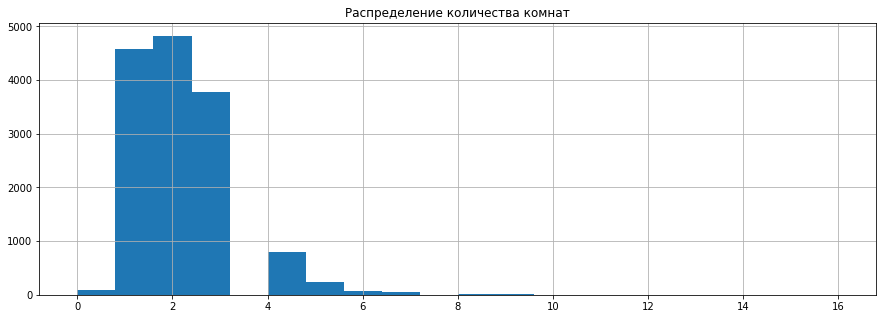

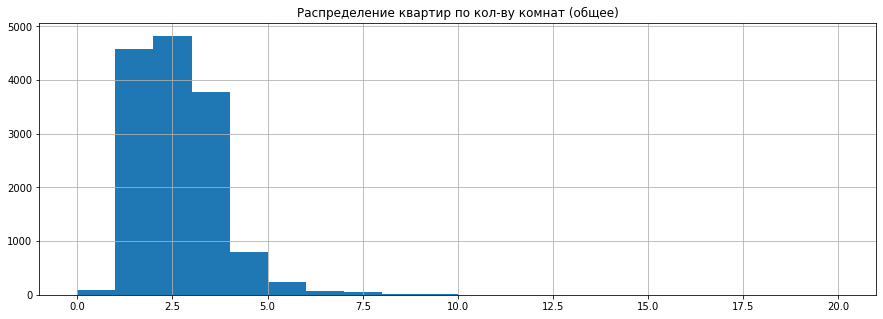

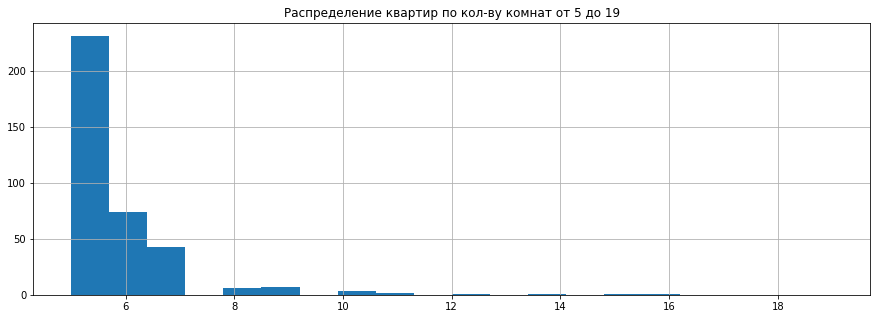

In [47]:
display_hist(current_col_name, 'Распределение количества комнат', 20)
display_hist(current_col_name, 'Распределение квартир по кол-ву комнат (общее)', 20, 0, 20)
display_hist(current_col_name, 'Распределение квартир по кол-ву комнат от 5 до 19', 20, 5, 19)

Распределение квартир по количеству комнат находится в адекватных интервалах. Выбросов не наблюдается. Большое количество комнат объясняется большой жилой площадью.

**Высота потолков**

In [48]:
current_col_name = 'ceiling_height'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean         2.727761
std          0.277590
min          2.450000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

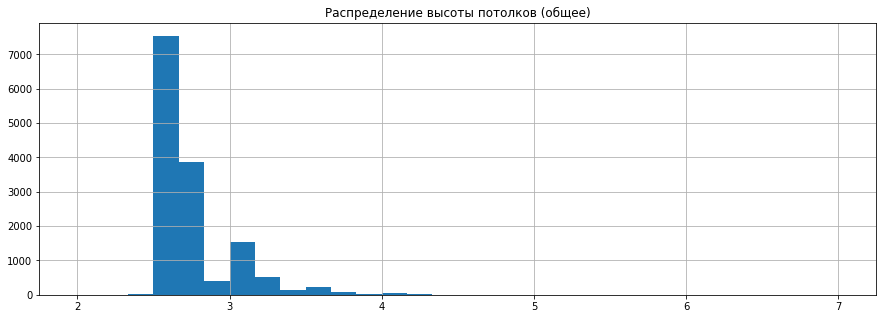

In [49]:
display_hist(current_col_name, 'Распределение высоты потолков (общее)', 30, 2, 7)

Высоту потолков мы обработали ранее, поэтому у большинства квартир стандартная высота - 2,65м.

**Этаж квартиры**

In [50]:
current_col_name = 'floor'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean         5.629953
std          4.621850
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

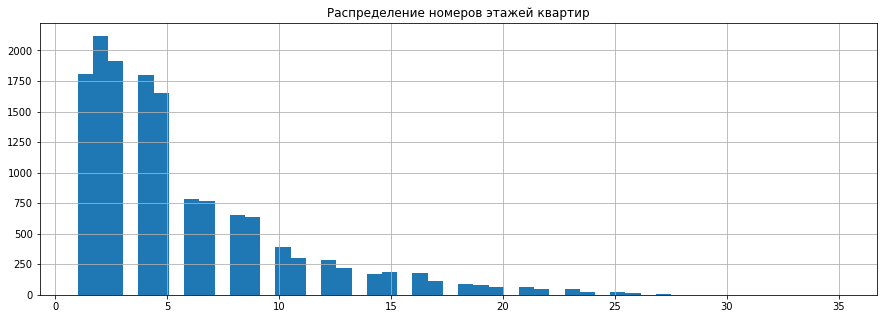

In [51]:
display_hist(current_col_name, 'Распределение номеров этажей квартир', 50, 1, 35)

Медианное значение этажа, на котором располагаются квартиры - 4 этаж. За счет квартир на высоких этажах медианное значение ниже среднего.

**Тип этажа квартиры**

In [52]:
data.pivot_table(index='flat_floor_type', values='last_price', aggfunc='count')

,last_price
flat_floor_type,
первый,1798
последний,2089
средний,10549


Для анализа типа этажа квартиры достаточно сводной таблицы. Большинство квартир находятся на средних этажах.

**Общее количество этажей в доме**

In [53]:
current_col_name = 'floors_total'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean        10.184816
std          6.202567
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

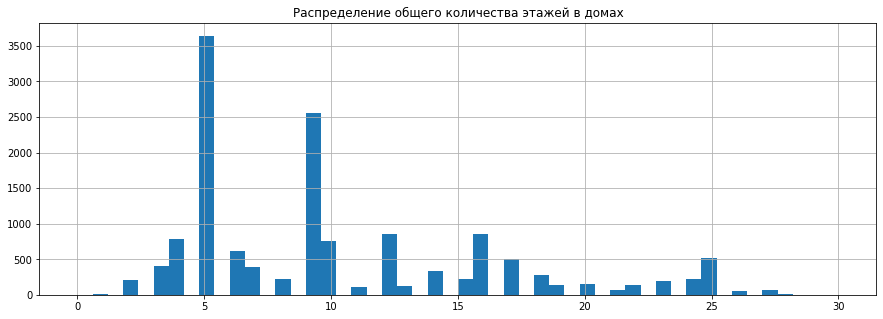

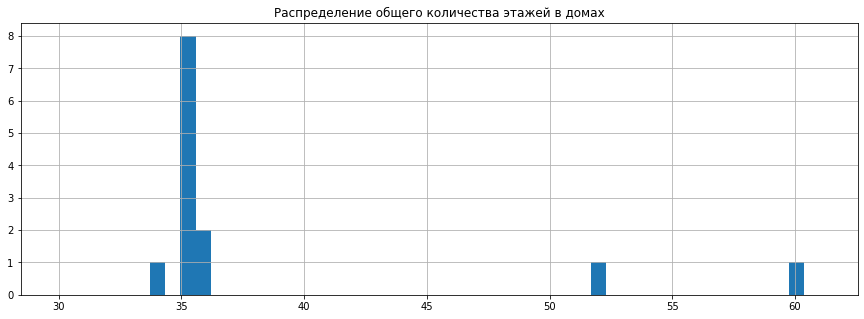

In [54]:
display_hist(current_col_name, 'Распределение общего количества этажей в домах', 50, 0, 30)
display_hist(current_col_name, 'Распределение общего количества этажей в домах', 50, 30, 61)

В выборке есть значения, которые выбиваются из общей массы. Например, 52 и 60-этажные дома, 3 здания, этажность которых более 35 этажей. Посмотрим, что это за объекты.

In [55]:
display(data[data['floors_total'] == 60])
display(data[data['floors_total'] == 60]['locality_name'])

display(data[data['floors_total'] == 52])
data[data['floors_total'] == 52]['locality_name']

display(data[data['floors_total'] == 36])
data[data['floors_total'] == 36]['locality_name']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
2253,12,3800.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,83.52,3,6,2018,средний,49


2253    Кронштадт
Name: locality_name, dtype: object

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
16731,9,3978.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,99.45,0,9,2018,средний,12


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
5807,17,8150.0,80.0,2019-01-09,2,2.7,36.0,41.0,13,False,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,101.88,2,1,2019,средний,20
11079,16,9200.0,75.0,2019-02-22,2,2.7,36.0,40.0,29,False,False,False,12.0,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,122.67,4,2,2019,средний,20


5807     Санкт-Петербург
11079    Санкт-Петербург
Name: locality_name, dtype: object

В Кронштадте нет высоких зданий, в Санкт-Петербурге самое высокое здание - это Лахта центр, в котором всего 35 этажей, поэтому указанные максимальные количества этажей в домах не соответствуют действительности. Ошибка при заполнении данных пользователем. В будущем эти значения можно не учитывать в анализе.

**Расстояние до центра города в метрах**

In [56]:
current_col_name = 'city_centers_nearest'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    14436.000000
mean     13684.477071
std       7862.080763
min        181.000000
25%      10594.250000
50%      12177.000000
75%      15195.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

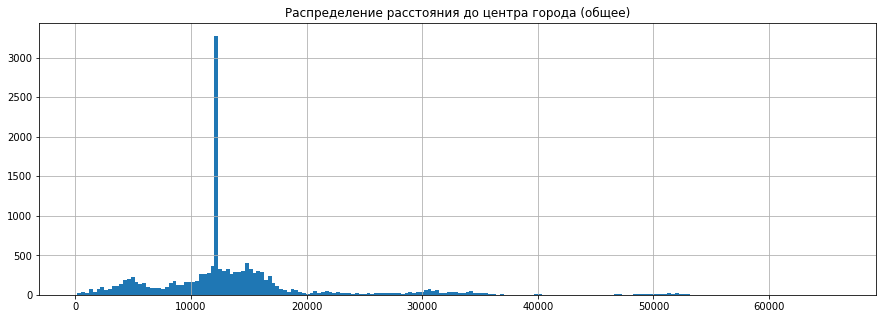

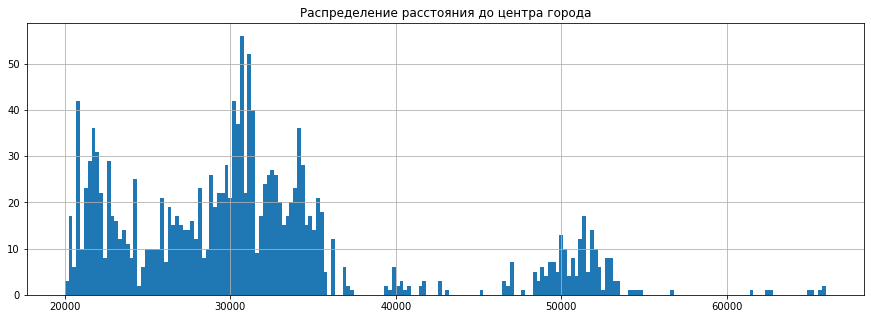

In [57]:
display_hist(current_col_name, 'Распределение расстояния до центра города (общее)', 200, 180, 66000)
display_hist(current_col_name, 'Распределение расстояния до центра города', 200, 20000, 66000)

В выборке присутствует выдающееся значение. Одно и то же расстояние у 6 тыс. домов. Выведем записи и посмотрим указанные населенные пункты.

In [58]:
display(data[data['city_centers_nearest'] == 12244])
data[data['city_centers_nearest'] == 12244]['locality_name']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,num_day_exposition,num_month_exposition,num_year_exposition,flat_floor_type,city_center_distance
13594,4,3490.0,31.0,2018-10-11,1,2.65,16.0,14.0,6,False,False,False,7.0,0,Санкт-Петербург,13448.0,12244.0,0.0,NaN,0.0,NaN,69.0,112.58,3,10,2018,средний,12
17223,8,4700.0,40.5,2017-07-12,1,2.65,16.0,20.0,5,False,False,False,10.0,1,Санкт-Петербург,13448.0,12244.0,0.0,NaN,0.0,NaN,585.0,116.05,2,7,2017,средний,12


13594    Санкт-Петербург
17223    Санкт-Петербург
Name: locality_name, dtype: object

Видно, что это разные населенные пункты. Можно предположить, что это была техническая ошибка при заполнении данных.

**Расстояние до ближайшего аэропорта**

In [59]:
current_col_name = 'airports_nearest'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    11498.000000
mean     28837.787615
std      12634.940407
min          0.000000
25%      18553.250000
50%      26765.500000
75%      37099.000000
max      84869.000000
Name: airports_nearest, dtype: float64

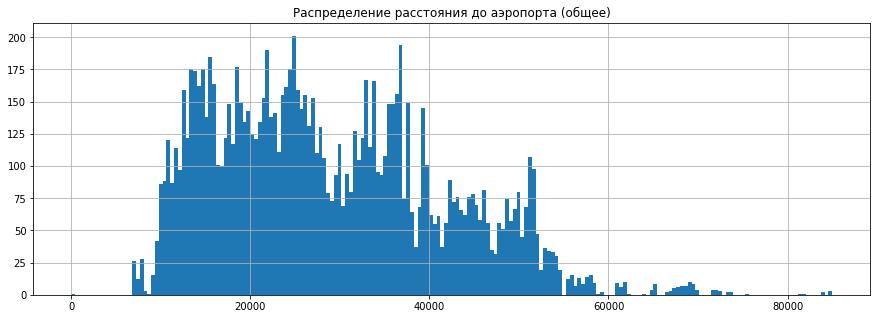

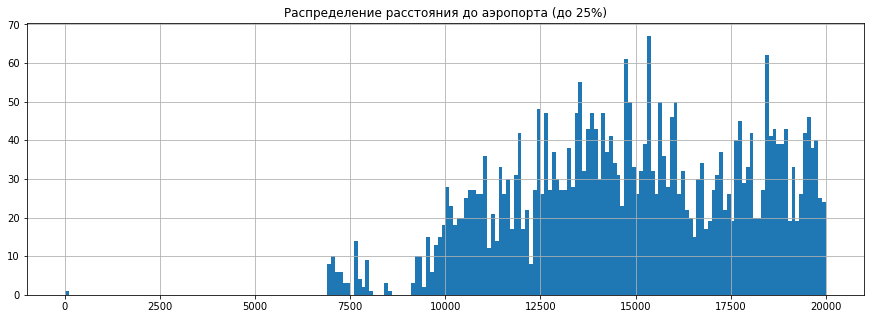

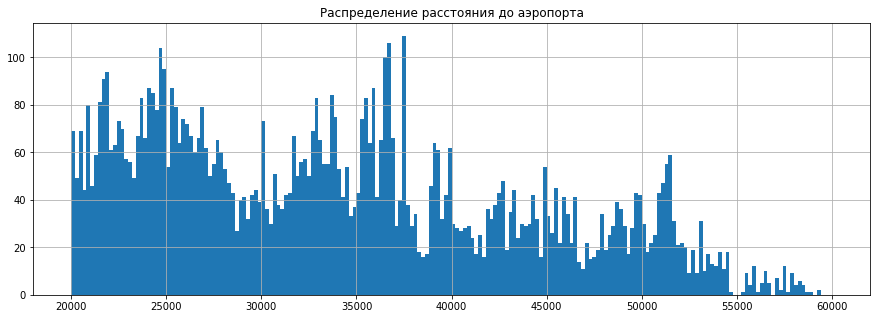

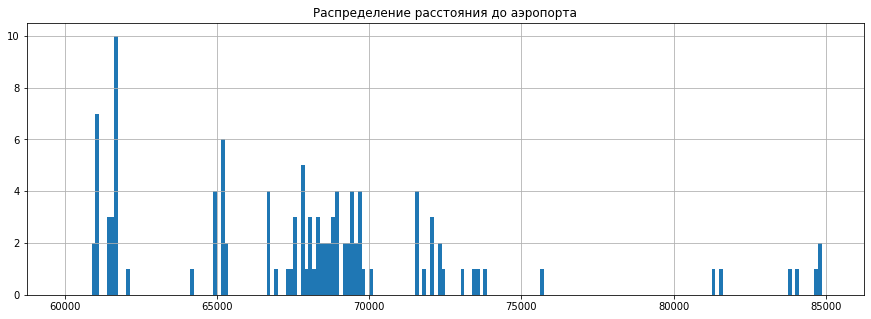

In [60]:
display_hist(current_col_name, 'Распределение расстояния до аэропорта (общее)', 200, 0, 85000)
display_hist(current_col_name, 'Распределение расстояния до аэропорта (до 25%)', 200, 0, 20000)
display_hist(current_col_name, 'Распределение расстояния до аэропорта', 200, 20000, 60000)
display_hist(current_col_name, 'Распределение расстояния до аэропорта', 200, 60000, 85000)

Выбивающихся значений не наблюдается. Нулевые расстояния можно не учитывать в анализе.

**Расстояние до ближайшего парка**

In [61]:
current_col_name = 'parks_nearest'

# Выведем описательную статистику для определения интервала гистограммы
display(data[current_col_name].describe())

count    5268.000000
mean      476.567578
std       320.466257
min         3.000000
25%       284.750000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

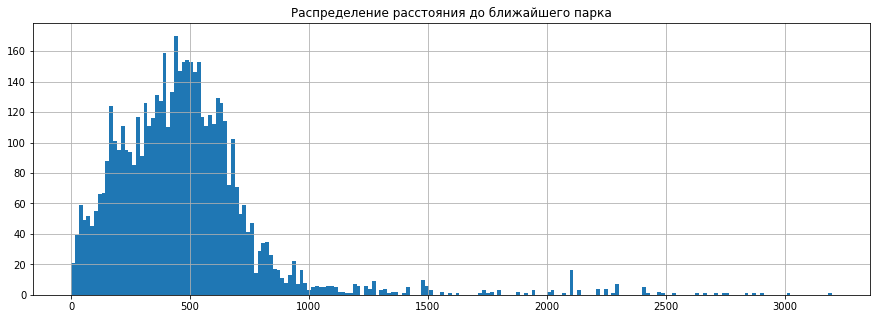

In [62]:
display_hist(current_col_name, 'Распределение расстояния до ближайшего парка', 200, 1, 3200)

Вывод
Для кого-то и 3км является близко... А другие просто не указывают, что рядом есть парк. Показатель "рядом" у каждого субъективный (если это человек)
1 метр до парка?

**День и месяц публикации объявления**

In [63]:
# Выведем описательную статистику для определения интервала гистограммы
display(data['num_day_exposition'].describe())
display(data['num_month_exposition'].describe())

count    14436.000000
mean         2.501039
std          1.789996
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: num_day_exposition, dtype: float64

count    14436.000000
mean         6.323358
std          3.501027
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: num_month_exposition, dtype: float64

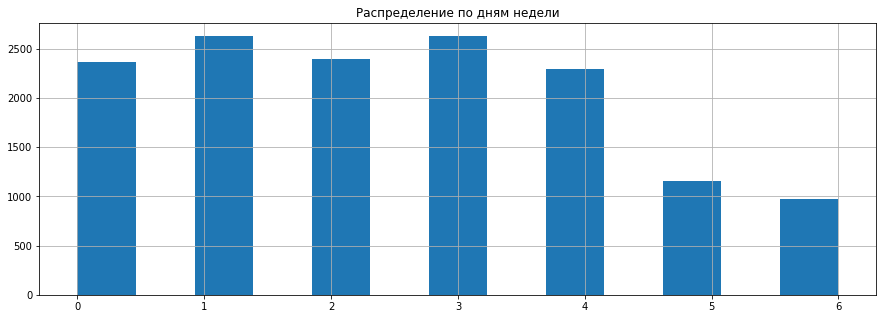

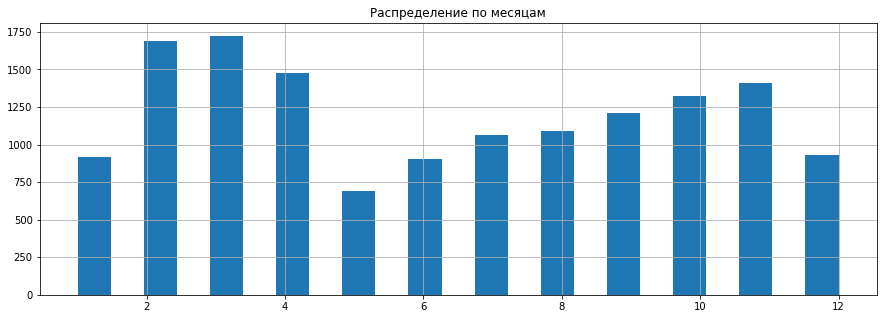

In [64]:
display_hist('num_day_exposition', 'Распределение по дням недели', 13, 0, 6)
display_hist('num_month_exposition', 'Распределение по месяцам', 23, 1, 12)

В выходные дни публикуют меньше объявлений, чем в будние дни. Пик публикаций приходится на февраль. К маю количество публикаций падает, а начиная с июня по ноябрь количество публикаций растет.

**Вывод**

Были построены гистограммы и была выведена описательная статистика по необходимым показателям. Большинство значений находится в допустимых пределах и соответствует привычному представлению. Выбивающиеся значения объяснимы.

### Скорость продажи квартир

Изучим, как быстро продавались квартиры. Построим гистограмму, посчитаем среднее и медиану

count    11990.000000
mean       190.579066
std        228.950049
min          1.000000
25%         45.000000
50%        103.000000
75%        247.750000
max       1580.000000
Name: days_exposition, dtype: float64

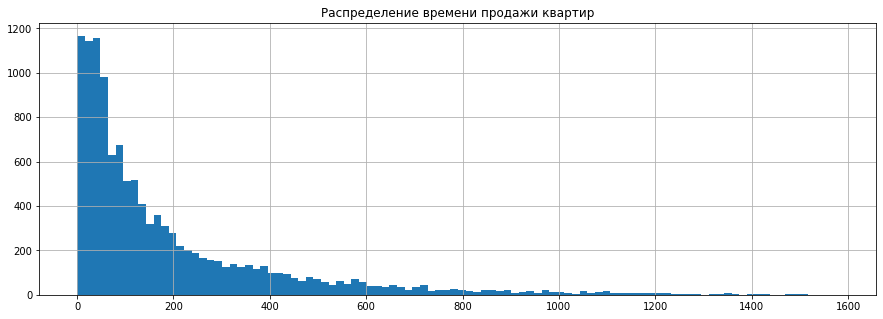

In [65]:
current_col_name = 'days_exposition'

# display(data[current_col_name].isna().sum())
display(data['days_exposition'].describe())
display_hist(current_col_name, 'Распределение времени продажи квартир', 100)

Среднее время продажи квартиры составляет около 180 дней, при этом медианное время - 95 дней. 25% квартир продаются менее, чем за 1,5 месяца. Также есть квартиры, которые продаются достаточно долго - более 232 дней (почти 8 месяцев). Самая быстрая продажа квартиры была за 1 день, а самая долгая - за 1580 дней (почти 4,5 года).

Построим сводную таблицу по длительности продажи

In [66]:
data.pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False)

,first_day_exposition
days_exposition,
45.0,390
60.0,274
7.0,154
30.0,150
4.0,103
...,...
884.0,1
885.0,1
889.0,1


Экстремальные значения находятся на 45, 60 днях. Это значит, что за 45 или 60 дней публикации объявления объект продается чаще всего. Далее количество продаж распределяется относительно равномерно (для 7, 30, 90 дней).

### Факторы, влияющие на стоимость объекта

Рассмотрим, как цена, общая площадь, жилая площадь, площадь кухни и количество комнат влияет на стоимость объекта. Это можно оценить с помощью коэффициента корреляции. Для удобства восприятия данных построим тепловую карту (матрицу) значений корреляции - зависимости цены объекта и вышеперечисленных факторов.

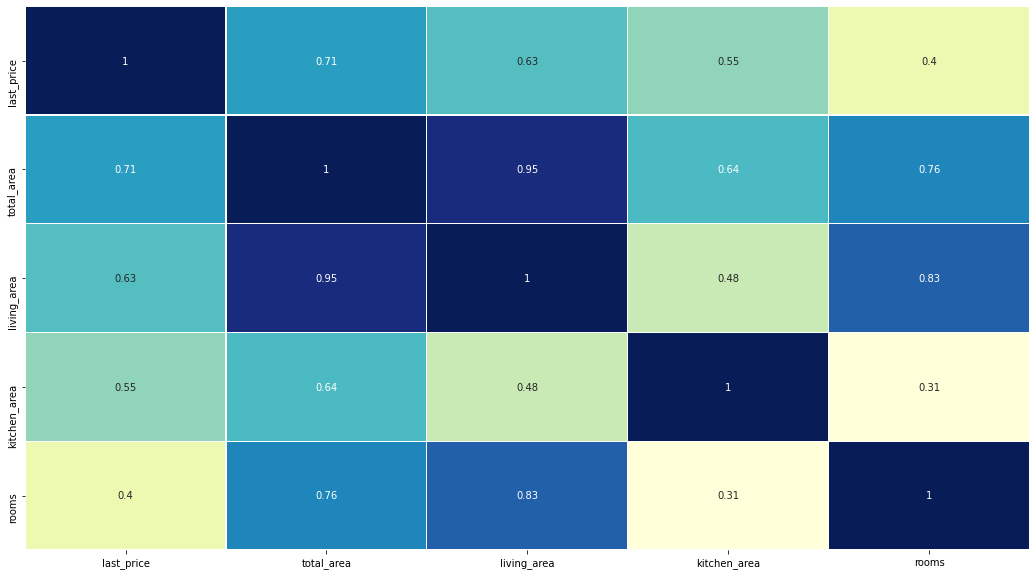

In [67]:
plt.figure(figsize=(18, 10))
sns.heatmap(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

Сильная корреляция наблюдается между общей ценой объекта и его площадью, и между площадью и количеством комнат, что вполне ожидаемо. Средняя - между общей ценой и ценой 1 кв. м, общей ценой и количеством комнат и относительной площадью кухни. Слабая отрицательная корреляция между расстоянием до центра города и ценой - к окраинам квартиры немного дешевле как в целом, так и за 1 кв. м.

In [68]:
# Напишем функцию, которая строит графики корреляции двух величин
def create_corr_plot(df, x_values, y_values):
    display(df.plot(x=x_values, y=y_values, kind='scatter', alpha=0.3) )

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

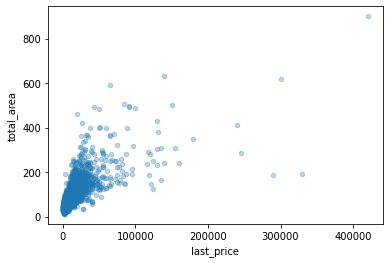

In [69]:
# Зависимость цены недвижимости от общей площади
create_corr_plot(data, 'last_price', 'total_area')

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

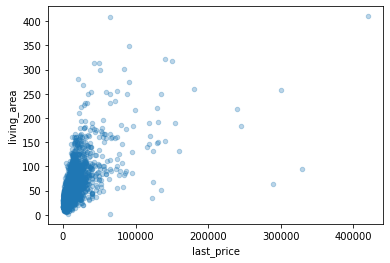

In [70]:
# Зависимость цены недвижимости от общей площади
create_corr_plot(data, 'last_price', 'living_area')

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

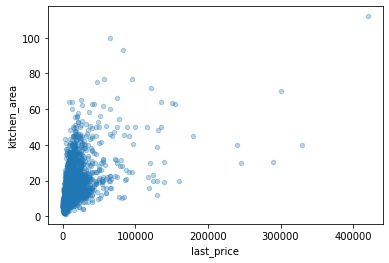

In [71]:
# Зависимость цены недвижимости от площади кухни
create_corr_plot(data, 'last_price', 'kitchen_area')

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

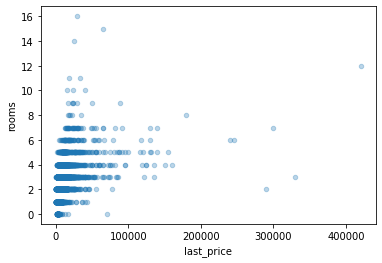

In [72]:
# Зависимость цены недвижимости от количества комнат
create_corr_plot(data, 'last_price', 'rooms')

Графическая интерпретация корреляции цены недвижимости и общей, жилой, кухонной площади, количества комнат дает по-другому посмотреть на данные, но суть не меняет. Вывод остается тем же (см. выше).

**Зависимость цены квартиры от типа этажа**

,last_price
flat_floor_type,
последний,7490.224000
средний,7019.167719
первый,5081.419424


<AxesSubplot:xlabel='flat_floor_type'>

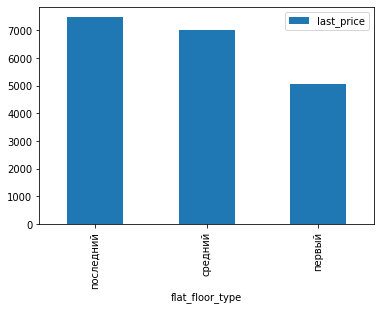

In [73]:
# Создадим сводную таблицу
data_floor_type_pvt = data.pivot_table(index='flat_floor_type', 
                                       values='last_price').sort_values(by='last_price', ascending=False)
display(data_floor_type_pvt) # Выведем таблицу на экран
data_floor_type_pvt.plot(kind='bar') # Нарисуем график

На первых этажах стоимость квартир ниже, чем на последних этажах. Самая высокая стоимость объектов, которые располагаются на средних этажах.

**Зависимость стоимости объекта от дня, месяца и года размещения**

Для оценки зависимости построим сводные таблицы

,last_price
num_day_exposition,
0,6962.531535
1,6897.386419
2,6974.551783
3,7077.838778
4,6717.902841
5,6278.997181
6,6457.508610


<AxesSubplot:xlabel='num_day_exposition'>

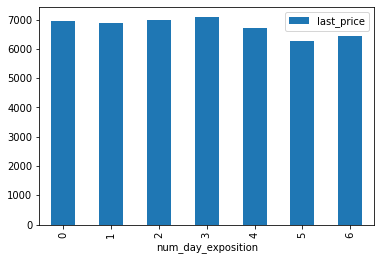

In [74]:
# зависимость стоимости от дня недели
df_num_day_exp_pvt = data.pivot_table(index='num_day_exposition', values='last_price', aggfunc='mean')

display(df_num_day_exp_pvt) # Выведем таблицу на экран
df_num_day_exp_pvt.plot(kind='bar') # Нарисуем график

Нельзя однозначно говорить о зависимости средней стоимости недвижимости от дня публикации объявления.

,last_price
num_month_exposition,
1,7194.193563
2,6684.272526
3,6445.928397
4,7202.590540
5,6974.821225
6,6368.301997
7,7335.620159
8,6752.370956
9,6768.025309


<AxesSubplot:xlabel='num_month_exposition'>

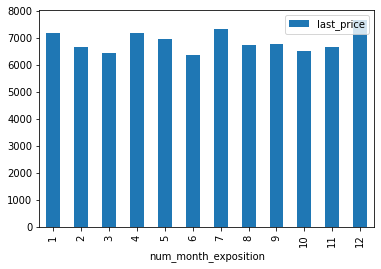

In [75]:
# зависимость стоимости от месяца
df_num_month_exp_pvt = data.pivot_table(index='num_month_exposition', values='last_price', aggfunc='mean')

display(df_num_month_exp_pvt) # Выведем таблицу на экран
df_num_month_exp_pvt.plot(kind='bar') # Нарисуем график

Зависимости между ценой недвижимости и месяцем публикации объявления не наблюдается. С января по март средняя стоимость падает. В апреле средняя стомость повышается, но затем снова падает до начала июля. В сентябре снова наблюдается повышение средней, в октябре спад с дальнейшим повышением до конца декабря. Динамика средней стоимости недвижимости по месяцам носит цикличный харакетр.

,last_price
num_year_exposition,
2014,11891.589893
2015,9955.443887
2016,7024.949648
2017,7096.703428
2018,6150.034032
2019,7029.098290


<AxesSubplot:xlabel='num_year_exposition'>

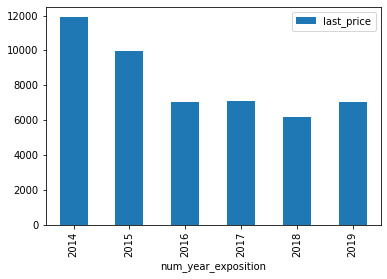

In [76]:
# зависимость цены от месяца
df_num_year_exp_pvt = data.pivot_table(index='num_year_exposition', values='last_price', aggfunc='mean')

display(df_num_year_exp_pvt) # Выведем таблицу на экран
df_num_year_exp_pvt.plot(kind='bar') # Нарисуем график

В 2015 году наблюдалась самая высокая средняя стоимость недвижимости. С 2016 по 2018 года стоимость падала, однако в 2019 средняя стоимость стала снова повышаться. Цена квартир меняется из года в год под воздействием событий, влияющих на рынок недвижимости.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Построим сводные таблицы

In [95]:
data_price_m2_pivot = data.pivot_table(index='locality_name',
                                       values=['price_per_m2'],
                                       aggfunc={'price_per_m2':['count', 'median', 'mean']})

# Выведем таблицу, отсортированную по количеству объявлений по каждому региону
display(data_price_m2_pivot.sort_values(by=[('price_per_m2','count')], ascending=False).head(10))

price_per_m2                    
                       count        mean  median
locality_name                                   
Санкт-Петербург        10081  115.701325  105.73
Всеволожск               271   67.434576   65.79
Пушкин                   231  103.965584  100.00
Мурино                   228   87.816974   86.43
Шушары                   217   79.538571   77.74
Колпино                  202   75.973168   74.73
Кудрово                  194   96.105515   96.56
Гатчина                  149   69.992617   68.60
Петергоф                 145   85.554069   82.14
Парголово                137   90.902044   91.04

price_per_m2                    
                       count        mean  median
locality_name                                   
Санкт-Петербург        10081  115.701325  105.73
Всеволожск               271   67.434576   65.79
Пушкин                   231  103.965584  100.00
Мурино                   228   87.816974   86.43
Шушары                   217   79.538571   77.74
Колпино                  202   75.973168   74.73
Кудрово                  194   96.105515   96.56
Гатчина                  149   69.992617   68.60
Петергоф                 145   85.554069   82.14
Парголово                137   90.902044   91.04

(0.0, 200.0)

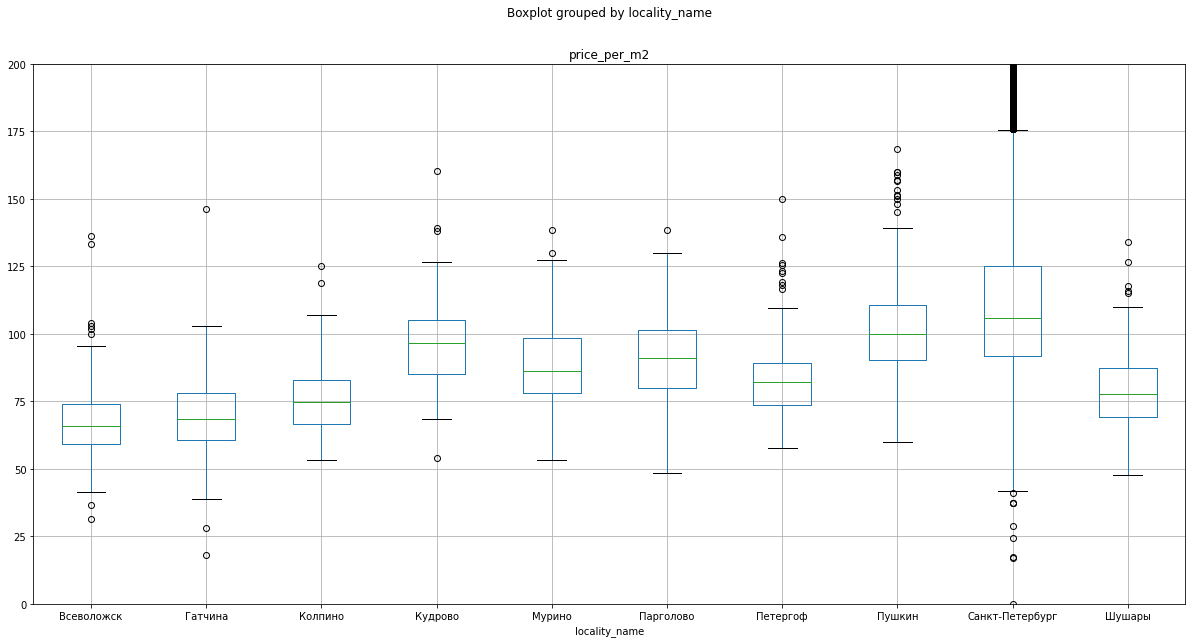

In [85]:
top_locality = data_price_m2_pivot.sort_values(by=[('price_per_m2','count')], ascending=False).head(10)

display(top_locality)

ax = (data
    .query('locality_name in @top_locality.index')
    .boxplot('price_per_m2', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200)

Санкт-Петербург, Мурино, Кудрово являются регионами с наибольшим количеством объявлений.

price_per_m2                     
                       count        mean   median
locality_name                                    
Санкт-Петербург        10081  115.701325  105.730
Зеленогорск               19  113.035789  103.330
Мистолово                  3  107.123333   98.410
Бор                        1  105.540000  105.540
Репино                     4  104.240000   86.545
Пушкин                   231  103.965584  100.000
Сестрорецк               129  102.267054  101.290
Кудрово                  194   96.105515   96.560
Стрельна                  26   91.006154   88.680
Парголово                137   90.902044   91.040

<AxesSubplot:xlabel='locality_name'>

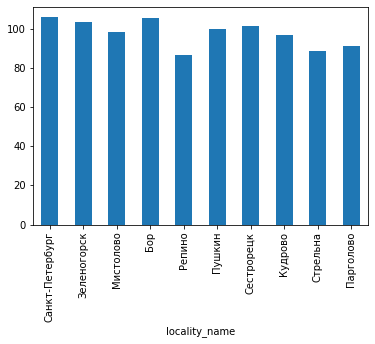

In [78]:
# Выведем таблицу, отсортированную по средней цене квадратного метра по регионам
data_price_m2_pvt_sorted = data_price_m2_pivot.sort_values(by=[('price_per_m2','mean')], ascending=False).head(10)
display(data_price_m2_pvt_sorted)

data_price_m2_pvt_sorted[('price_per_m2','median')].plot(kind='bar')

В выборке из 10 регионов с наибольшим количеством объявлений Зеленогорск, Санкт-Петербург, Репино являются регионами с самой высокой стоимостью одного квадратного метра жилья, а Левашово, Кудрово, Парголово имеют самую низкую цену за квадратный метр жилья.

### Средняя цена километра

Построим сводную таблицу и отразим ее данные на графике.

,price_per_m2
city_center_distance,
0,169.455789
1,174.699467
2,147.486489
3,126.223953
4,137.491939
5,145.566494
6,155.640709
7,137.485061
8,123.345405


<AxesSubplot:xlabel='city_center_distance', ylabel='price_per_m2'>

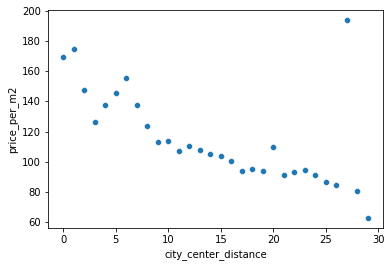

In [79]:
# Построим сводную таблицу
# Убрать про СпБ
city_center_price_km_pivot = data[data['locality_name']== 'Санкт-Петербург'].pivot_table(index='city_center_distance',
                                                                                         values='price_per_m2')
# Выведем таблицу на экран
display(city_center_price_km_pivot)
sns.scatterplot(data=city_center_price_km_pivot, x="city_center_distance", y="price_per_m2")

Чем дальше квартиры расположены от центра Санкт-Петербурга, тем они дороже. До 20 км от центра видно, что цены падают. Далее 20 км разброс цен и расстояния от центра усиливается. Возможно, по мере отдалености от центра появляются дополнительные факторы, влияющие на цены. Например, пристижность ЖК или более развитая инфраструктура.

### Общий вывод

В проекте была проведена предобработка данных:
- Удалены пропуски
- Восстановлены некоторые незаполненные значения
- Скорректированы наименования столбцов
- Приведены наименования населенных пунктов к единому виду
- Скорректирован тип данных
- Удалены записи, в которых значения некоторых параметров не отражали реальность

Характер пропусков - в основном ошибки при заполнении данных пользователем. Скорее всего, была слабая валидация данных: можно было указать любую высоту потолков, не заполнить количество комнат, этаж и, возможно, населенный пункт.

Далее рассчитали дополнительные показатели, которые необходимы для дальнейшего анализа:
- Цена квадратного метра
- День недели, месяц, год продажи недвижимости
- Тип этажа (первый / средний / последний)
- Расстояние от объекта до центра населенного пункта

Описаны и построены гистограммы по ключевым параметрам датасета. После предобработки данных все равно были выявлены выбивающиеся значения:
- У 5489 объектов указано одинаковое расстояние до центра
- Некорректно проставлена величина крайнего этажа у 4-х объектов (1 в Кронштадте и 3 в Санкт-Петербурге)
Остальные параметры были изменены на этапе предобработки данных либо выбросы объяснимы.

Большинство квартир продаются за полтора месяца. Среднее время продажи квартиры составляет около полугода. Встречались и такие квартиры, которые продавались за несколько лет.

Для определения факторов, которые влияют на общую стоимость квартир построили матрицу значений корреляции. Наиболее сильно влияет общая площадь квартиры (в основном жилая). Зависимость между количеством комнат и стоимостью квартиры слабая. Возможно из-за наличия комнат со свободной планировкой. Квартиры на последних этажах стоят дороже, чем на первых и средних. Особой зависимости между месяцем или днем публикации не наблюдается. С 2016 по 2018 года стоимость падала, однако в 2019 средняя стоимость стала снова повышаться.

Цена квадратного метра является высокой в Санкт-Петербурге, Зеленогорске и Репино. Больше всего объектов выставлено на продажу в Санкт-Петербурге, мерина и Кудрово.

В проекте был проведен анализ стоимости квадратного метра в зависимости от отдаленности объекта от центра. Чем дальше недвижимость расположена от центра, тем она дороже. После 20 км от центра также наблюдается более широкий разброс цен. Это может быть связано с наличием более развитой инфраструктуры, месторасположением от промышленной зоны и др.